In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.transformations.compose import FitInTransform
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sktime.transformations.panel.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
def load_npy(filename):
    return np.load(filename)

In [3]:
dir_path = '/Users/thomasgonzo/Desktop/data mining /dataset/time_series/'

len_threshold = 1280

In [4]:
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre
    ts = load_npy(dir_path + file)
    
    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation
        ts = np.append(ts, pad) 

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)

In [5]:
nd_reshaped = X.reshape(10000,1280)

In [6]:
df = pd.DataFrame(nd_reshaped)

In [7]:
def noise_removing(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window = 10).mean()

In [8]:
df_noise_scaled = df.apply(noise_removing, axis = 1)

In [ ]:
filled_df = df_noise_scaled.apply(lambda row: row.fillna(row.mean()),axis = 1)
# this is the dataframe filled and after the removal of noise
filled_df  

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,0.005776,-0.726010,...,-0.579219,-0.591045,-0.605567,-0.608599,-0.588871,-0.535954,-0.489565,-0.460714,-0.472738,-0.486099
1,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,-0.005210,1.504967,...,-0.440377,-0.356866,-0.160761,0.038829,0.205647,0.295774,0.355192,0.410689,0.447727,0.353964
2,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.006539,-0.231888,...,-0.502055,-0.281987,-0.039137,0.208783,0.466430,0.743420,1.046023,1.369823,1.598744,1.767249
3,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,0.010123,-0.959821,...,-1.654070,-1.639285,-1.638362,-1.674885,-1.711214,-1.770243,-1.812511,-1.826641,-1.842982,-1.865446
4,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.001997,0.085572,...,-0.197603,-0.269463,-0.247127,-0.155357,-0.105520,-0.168686,-0.342160,-0.548045,-0.689153,-0.751124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,0.005561,-0.236191,...,-0.439387,-0.414987,-0.372197,-0.304222,-0.308620,-0.339709,-0.253636,-0.168561,-0.148589,-0.296570
9996,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.000545,0.367873,...,-0.202299,-0.165452,-0.147229,-0.137300,-0.116994,-0.080039,-0.068720,-0.090610,-0.148518,-0.243125
9997,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,0.226524,...,1.330972,1.580832,1.783174,1.832325,1.905599,1.986387,1.920546,1.762407,1.569558,1.441567
9998,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,0.007319,-1.000745,...,0.304283,0.329402,0.308823,0.280976,0.234414,0.159012,0.032844,-0.166751,-0.408979,-0.674757


approximation with PAA 

In [11]:
from sktime.transformations.panel.dictionary_based import PAA

In [12]:
paa = PAA(num_intervals=128)

In [13]:
approximated_df = filled_df.apply(lambda row: paa.fit_transform(row), axis = 1)

In [14]:
approximated_df 

timepoints,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.067403,0.108742,0.607830,0.638206,0.441009,0.559658,0.893185,0.881624,-0.084429,-0.538062,...,-1.633014,-0.916530,-0.032768,0.281725,1.239581,1.973940,-0.700488,-0.325383,-0.447772,-0.541837
1,0.145807,1.143919,1.038501,0.642145,0.543635,0.427055,0.294509,0.476750,-0.023446,0.138478,...,0.014422,0.609055,1.319923,-0.067851,-0.492607,0.309858,-0.502056,-0.258663,-0.494816,0.114982
2,-0.029074,-0.338334,0.461292,0.400858,-0.103763,-0.252892,0.118610,0.098922,-0.204825,-0.177684,...,-0.688132,-0.337440,-1.130691,-1.019589,-0.076794,-1.022281,-1.015273,0.633325,-0.488028,0.637729
3,-0.086871,-0.863971,-1.215740,-1.608967,-0.976286,-0.608285,-0.222431,0.157262,0.566575,0.635717,...,-1.507467,-1.212301,-1.366794,-2.016386,-2.311654,-1.752783,-1.313739,-1.555005,-1.680622,-1.743564
4,0.010355,0.074877,0.067345,-0.005520,-0.015977,0.628688,-0.101645,-0.421075,-0.049754,0.074604,...,0.079951,-0.782459,-0.758390,-0.009801,-0.667433,-0.255460,-0.148028,-0.423325,-0.308062,-0.347424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.018614,0.022319,-0.041668,0.359753,1.238243,0.418579,-0.206816,-0.733318,-0.739758,0.114157,...,-0.028050,0.163173,-0.132004,-0.169789,0.877748,-0.137661,-0.201951,-0.731203,-0.421151,-0.304648
9996,0.037278,0.615528,0.591486,0.769441,0.787193,0.430566,-0.094096,-0.163292,0.012434,0.868396,...,-0.258382,-0.176162,-0.208816,-0.189892,-0.260816,-1.474596,-1.028962,-0.127422,-0.186183,-0.140029
9997,0.019076,0.930628,1.659491,0.956119,0.106271,-0.352968,-0.462376,-0.066438,0.660668,0.811372,...,-0.357677,0.171202,0.896132,0.977400,0.653265,-0.065433,0.486598,0.683839,0.734961,1.711337
9998,-0.093487,-0.581452,-0.384754,-0.566093,-0.565560,-0.411848,-0.411166,-0.615767,-0.670316,0.521217,...,-0.239386,0.506482,0.400362,0.443252,1.114568,1.561409,-0.071487,-0.018482,0.280698,0.039927


approximation of the dataframe with SAX

In [15]:
from sktime.transformations.series.sax import SAX2
sax = SAX2(word_size=128, alphabet_size=5)
sax_df = filled_df.apply(lambda row: sax.fit_transform(row), axis = 1)

classification pipeline 


In [ ]:
# encode vector of class labels 
y = LabelEncoder().fit_transform(y)

In [ ]:
# splitting the dataset into training and test set, using df approximated with PAA
X_train, X_test, y_train, y_test = train_test_split(approximated_df,y,test_size = 0.3 , random_state = 42, stratify = y)

In [19]:
#normalization
norm = StandardScaler()
X_train_normalized = norm.fit_transform(X_train)
X_test_normalized = norm.fit_transform(X_test)

In [ ]:
# importing libraries 
from sklearn.metrics import classification_report
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [ ]:
# trial model with just 5 nn and euclidean distance 
knn = KNeighborsTimeSeriesClassifier(n_neighbors=5, distance="euclidean")

In [21]:
%time
knn.fit(X_train_normalized, y_train)
y_pred = knn.predict(X_test_normalized)
print(classification_report(y_test, y_pred))

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 14.1 µs
              precision    recall  f1-score   support

           0       0.07      0.02      0.03       150
           1       0.07      0.03      0.05       150
           2       0.05      0.03      0.04       150
           3       0.07      0.38      0.12       150
           4       0.08      0.01      0.02       150
           5       0.14      0.03      0.05       150
           6       0.11      0.01      0.02       150
           7       0.07      0.01      0.02       150
           8       0.08      0.76      0.15       150
           9       0.00      0.00      0.00       150
          10       0.20      0.01      0.01       150
          11       0.33      0.01      0.01       150
          12       0.29      0.01      0.03       150
          13       0.19      0.14      0.16       150
          14       0.07      0.03      0.04       150
          15       0.00      0.00      0.00       150
          16     

performance evaluation of the trial model 

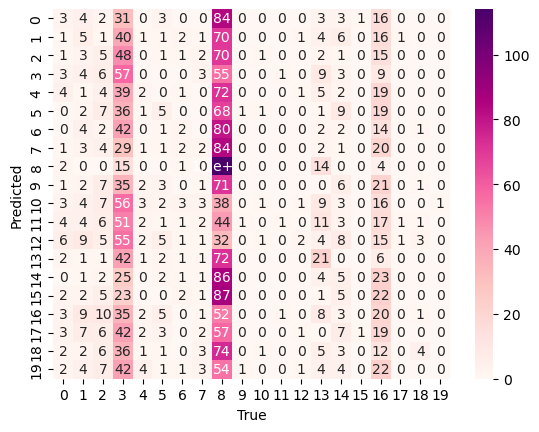

In [22]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot = True, cmap = 'RdPu')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

hyperparameter tuning 

In [23]:
from sklearn.metrics import( accuracy_score, f1_score,roc_auc_score)

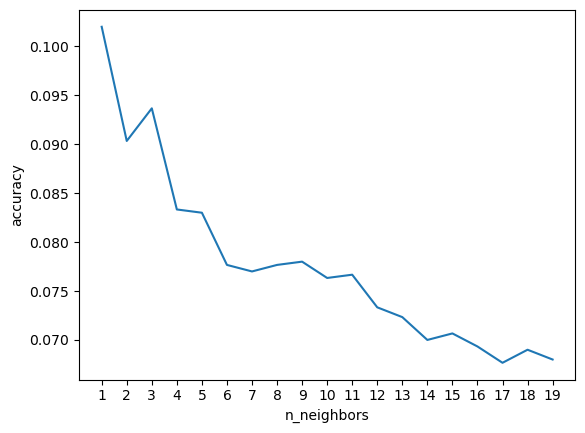

In [25]:
neighbors = range(1,20)
scores = list()
for neighbor in neighbors:
    classifier = KNeighborsTimeSeriesClassifier(n_neighbors=neighbor, distance="euclidean")
    classifier.fit(X_train_normalized, y_train)
    scores.append(classifier.score(X_test_normalized,y_test))
    
plt.plot(scores)
plt.xticks(range(len(neighbors)), neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

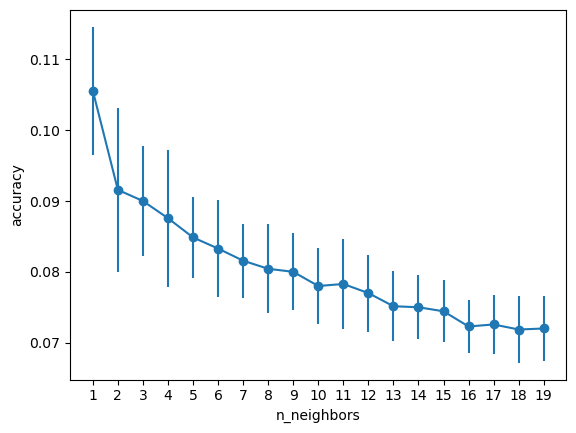

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsTimeSeriesClassifier(n_neighbors=n, distance="euclidean")
    scores = cross_val_score(clf, X_train_normalized, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

# plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

# 1 nn remains the most accurate parameter even after parameter tuning 


In [30]:
knn_euclidean = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="euclidean")

In [31]:
%time
knn_euclidean.fit(X_train_normalized, y_train)
y_predicted = knn_euclidean.predict(X_test_normalized)
print(classification_report(y_test,y_predicted))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 14.1 µs
              precision    recall  f1-score   support

           0       0.09      0.02      0.03       150
           1       0.16      0.05      0.08       150
           2       0.08      0.03      0.05       150
           3       0.09      0.35      0.15       150
           4       0.05      0.01      0.02       150
           5       0.17      0.11      0.13       150
           6       0.26      0.07      0.11       150
           7       0.03      0.01      0.02       150
           8       0.10      0.60      0.17       150
           9       0.17      0.01      0.02       150
          10       0.06      0.01      0.02       150
          11       0.22      0.03      0.06       150
          12       0.09      0.03      0.05       150
          13       0.10      0.13      0.11       150
          14       0.06      0.06      0.06       150
          15       0.14      0.01      0.02       150
          16 

In [ ]:
# test with dtw as metric 
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw")

In [33]:
%time
knn.fit(X_train_normalized, y_train)
y_pred = knn.predict(X_test_normalized)
print(classification_report(y_test, y_pred))

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 16.2 µs
              precision    recall  f1-score   support

           0       0.11      0.11      0.11       150
           1       0.09      0.07      0.08       150
           2       0.06      0.05      0.05       150
           3       0.21      0.35      0.26       150
           4       0.09      0.06      0.07       150
           5       0.22      0.18      0.20       150
           6       0.17      0.15      0.16       150
           7       0.06      0.07      0.07       150
           8       0.26      0.58      0.36       150
           9       0.07      0.05      0.06       150
          10       0.13      0.10      0.11       150
          11       0.18      0.07      0.10       150
          12       0.12      0.09      0.10       150
          13       0.16      0.15      0.15       150
          14       0.13      0.27      0.17       150
          15       0.12      0.07      0.09       150
          16     

hyperparameter tuning 


In [ ]:
# calculate the distance matrix with dtw with the sakoe-chiba band
from sklearn.metrics import accuracy_score
from sktime.distances import pairwise_distance
distance_X_train = pairwise_distance(X_train_normalized, metric = 'dtw', window = 0.15)
distance_X_test = pairwise_distance(X_test_normalized, X_train_normalized, metric = 'dtw', window = 0.15)


In [ ]:
# tuning k considering nearest neighbors up to 20 
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = range(1,20) 
scores = {}

for k in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric="precomputed")
    clf.fit(distance_X_train, y_train)
    y_pred = clf.predict(distance_X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[k] = acc
    
    
    
    

In [29]:
data_scores = pd.DataFrame(list(scores.items()), columns = ['k', 'accuracy'])

In [30]:
data_scores

,k,accuracy
0,1,0.147333
1,2,0.150000
2,3,0.150000
3,4,0.151667
4,5,0.145000
5,6,0.146000
6,7,0.149000
7,8,0.150000
8,9,0.151667
9,10,0.152000


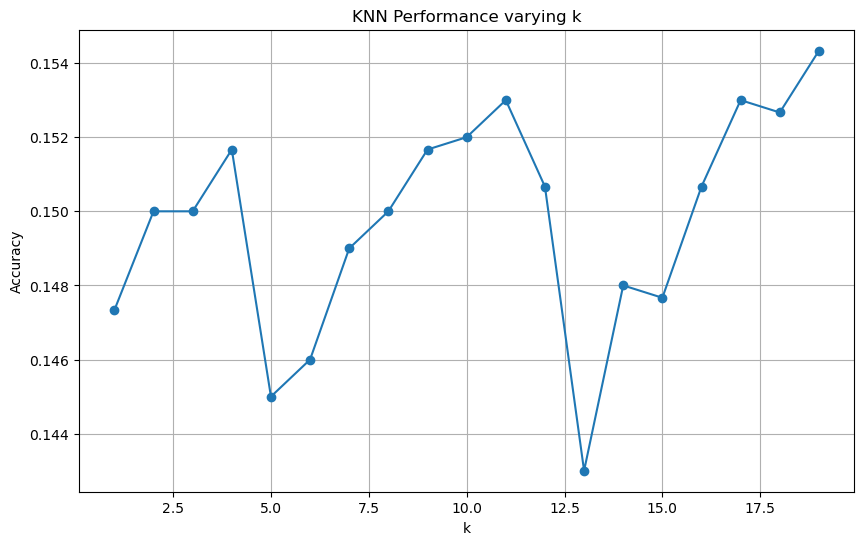

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(data_scores['k'], data_scores['accuracy'], marker='o')
plt.title('KNN Performance varying k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()